In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

Um pouco mais sobre Convolucao

In [217]:
def sinetone(fHz, phi=0, dur=1, SR=48000):
    '''Gera uma onda senoidal'''
    return np.sin(2*np.pi*fHz*np.arange(0, dur, 1/SR)+phi)

def tritone(fHz, dur=1, SR=48000):
    '''Gera duas senoides com um 
    intervalo musical de tritono'''
    return sinetone(fHz, 0, dur, SR) + sinetone(np.sqrt(2)*fHz, 0, dur, SR)

def correlacao(x, e):
    return abs(np.dot(x, e)/(np.linalg.norm(e)**2))

def exp_complexa(k, dur=1, SR=48000):
    return np.exp(2*np.pi*1j*k*np.arange(0, dur, 1/SR))

def squaretone(fHz, dur=1, SR=48000):
    '''Gera uma onda quadrada'''
    s = sinetone(fHz, 0, dur, SR)    
    return 1*(s>=0.)-1*(s<=0.)


def sawtone(fHz, dur=1, SR=48000):
    return sig.sawtooth(2*np.pi*fHz*np.arange(0, dur, 1/SR))


def steptone(samples, dur=1, SR=48000):
    step = np.zeros(int(dur*SR))
    step[0:samples] = 1
    return step

def FFT(x, dur=1, p=True, log=False):
    X = np.fft.fft(x)
    X = np.roll(X, len(X)//2) #esta linha, transforma o intervalo de [0, N) para [-N/2, N/2)
    
    if p:
        X = 2*X[len(X)//2:len(X)]
        
    if log:
        X = 20*np.log10(abs(X)+2.2204460492503131e-16)
    else:
        X = abs(X)
    
    return (np.linspace(0, len(X)/dur, len(X)), X)
    

In [238]:
np.eps

AttributeError: module 'numpy' has no attribute 'eps'

0.005333333333333333
256


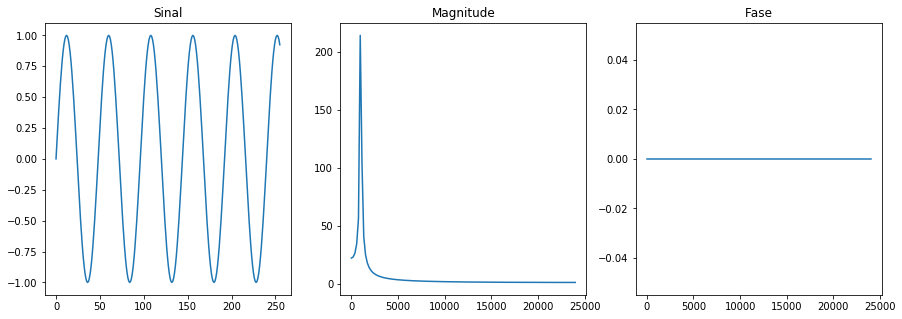

In [218]:
M  = 256
SR = 48000
dur= M/SR
print(dur)

xsin = sinetone(1000, dur=dur)

fSin, Xsin = FFT(xsin, dur=dur)

print(len(xsin))

plt.rcParams['figure.figsize'] = [15, 5]
plt.subplot(1, 3, 1)
plt.plot(xsin)
plt.title('Sinal')
plt.subplot(1, 3, 2)
plt.plot(fSin, Xsin[0:10000])
plt.title('Magnitude')
plt.subplot(1, 3, 3)
plt.plot(fSin, np.angle(Xsin)[0:10000])
plt.title('Fase')
plt.show()

In [219]:
len(windows)

5

In [220]:
def zero_padding(x, N):
    return np.pad(x, (N, N), 'constant')

Janelamento de Sinais

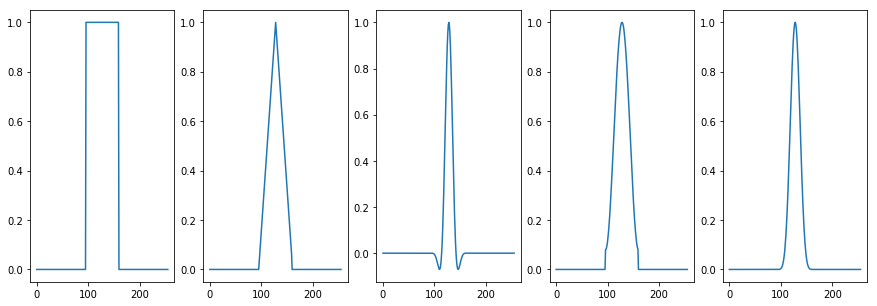

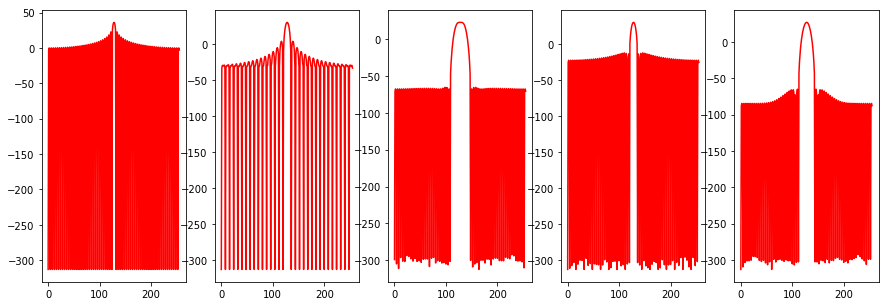

In [234]:
size = 64

w_box = sig.get_window('boxcar', 64)
w_tri = sig.get_window('triangle', 64)
w_flat = sig.get_window('flattop', 64)
w_hamm = sig.get_window('hamming', 64)
w_blh = sig.get_window('blackmanharris', 64)

windows = [w_box, w_tri, w_flat, w_hamm, w_blh]
for i in range(len(windows)):
    windows[i] = zero_padding(windows[i], (256-64)//2)


for i in range(len(windows)):
    plt.subplot(1, len(windows), i+1)
    plt.plot(windows[i])
    
    
plt.show()
    
for i in range(len(windows)):   
    freq, W = FFT(windows[i], p=False, log=True)
    plt.subplot(1, len(windows), i+1)
    plt.plot(W, color='r')
    
plt.show()

0.005333333333333333


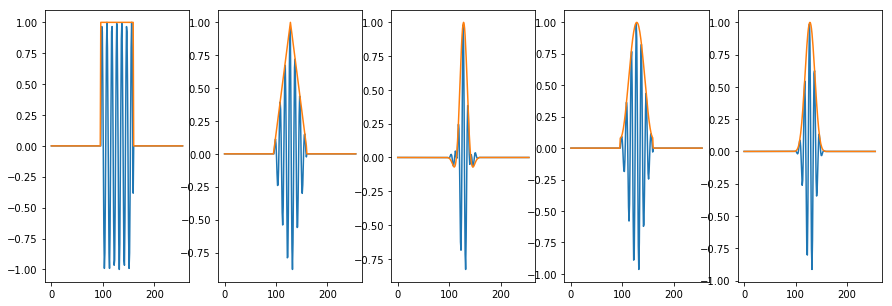

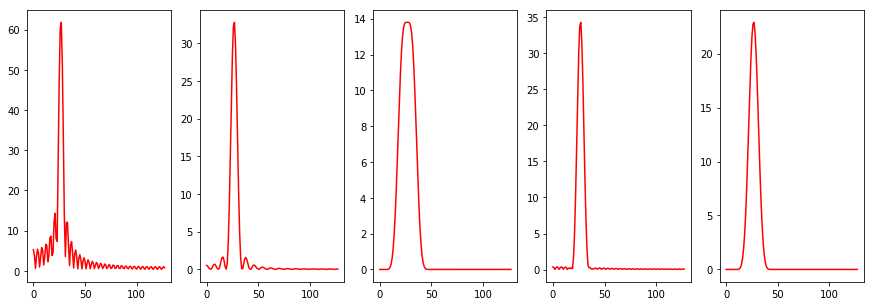

In [236]:
M  = 256
SR = 48000
dur= M/SR
print(dur)

xsin2 = sinetone(5000, dur=dur)


for i in range(len(windows)):
    plt.subplot(1, len(windows), i+1)
    
    plt.plot(windows[i]*xsin2)
    plt.plot(windows[i])
plt.show()


for i in range(len(windows)):   
    freq, W = FFT(windows[i]*xsin2)
    plt.subplot(1, len(windows), i+1)
    plt.plot(abs(W), color='r')
    
plt.show()